# K-NN(K Nearest Neighbor)

#### -k最近傍法  
▶ある入力xが与えられたときそのデータに最も近いk個のデータの平均値を予測値とする手法  
▶距離は通常、ユークリッド距離によって測る


##### ユークリッド距離E   
 $$ E = \sqrt{(b_1-a_1)^2 + (b_2-a_2)^2}$$

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

/home/kosuke/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/kosuke/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


/home/kosuke/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


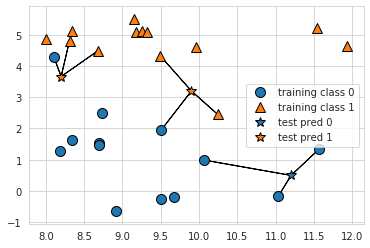

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

# Input Data

In [4]:
X, y = mglearn.datasets.make_forge()

/home/kosuke/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
print(X.shape)
print(y.shape)

(26, 2)
(26,)


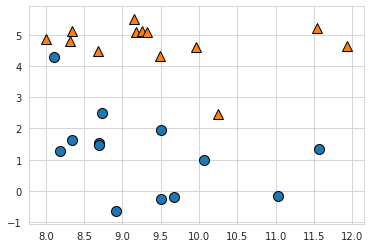

In [6]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.show()

# K-NN Learning

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(19, 2)
(7, 2)


In [9]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [10]:
print('predict:'+ str(clf.predict(X_test)))
print('label:'+ str(y_test))

predict:[1 0 1 0 1 0 0]
label:[1 0 1 0 1 1 0]


In [11]:
round(clf.score(X_test, y_test), 3)

0.857

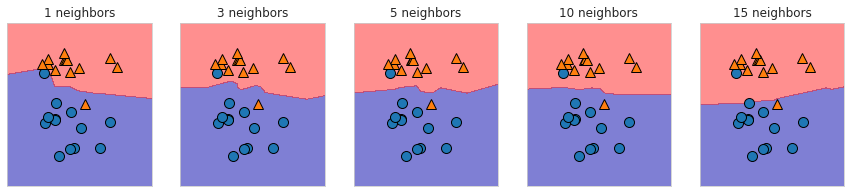

In [12]:
fig, axes = plt.subplots(1, 5, figsize=(15,3))

for n_neighbors,ax in zip([1, 3, 5, 10, 15], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, ax=ax, alpha=0.5)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    
plt.show()